In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.insert(0,'../python')

In [3]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi']=200
plt.rcParams['mathtext.fontset']='cm'

In [4]:
from timing import timing_reader

In [5]:
help(timing_reader)

Help on class timing_reader in module timing:

class timing_reader(builtins.object)
 |  timing_reader(base, pid)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, base, pid)
 |      Timing reader class
 |      
 |      Parameters
 |      ----------
 |      base : string, base directory name
 |      
 |      pid : string, problem id
 |      
 |      Methods
 |      -------
 |      load_task_time
 |      load_loop_time
 |      load_timing
 |  
 |  load_loop_time(self)
 |      Read .loop_time.txt file
 |      
 |      Parameters
 |      ----------
 |      
 |      Returns
 |      -------
 |      pandas.DataFrame
 |      
 |      The breakdown of each step of the main loop including
 |      Before, TimeIntegratorTaskList, SelfGravity, After
 |  
 |  load_task_time(self, groups=None)
 |      Read .task_time.txt file
 |      
 |      Parameters
 |      ----------
 |      groups : list, e.g., ['Hydro','Primitives','UserWork']
 |               if provided, group tasks that have the same s

In [6]:
tr=timing_reader('../../bin/','SpitzerDiff-sts-sat')

In [7]:
time=tr.load_timing()

In [8]:
time.to_array().sortby('variable')

<xarray.DataArray (variable: 11, ncycle: 411)>
array([[2.592e-03, 2.565e-03, 2.469e-03, ..., 1.378e-03, 1.303e-03,
        1.354e-03],
       [5.198e-03, 5.128e-03, 4.888e-03, ..., 2.675e-03, 2.631e-03,
        2.698e-03],
       [2.537e-03, 2.506e-03, 2.362e-03, ..., 1.254e-03, 1.282e-03,
        1.297e-03],
       ...,
       [1.500e-05, 1.200e-05, 1.200e-05, ..., 1.000e-05, 1.000e-05,
        1.000e-05],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 2.000e-06, 0.000e+00,
        2.000e-06],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])
Coordinates:
  * ncycle    (ncycle) int64 0 1 2 3 4 5 6 7 ... 403 404 405 406 407 408 409 410
  * variable  (variable) <U11 'After' 'All' ... 'SelfGravity' 'UserWork'

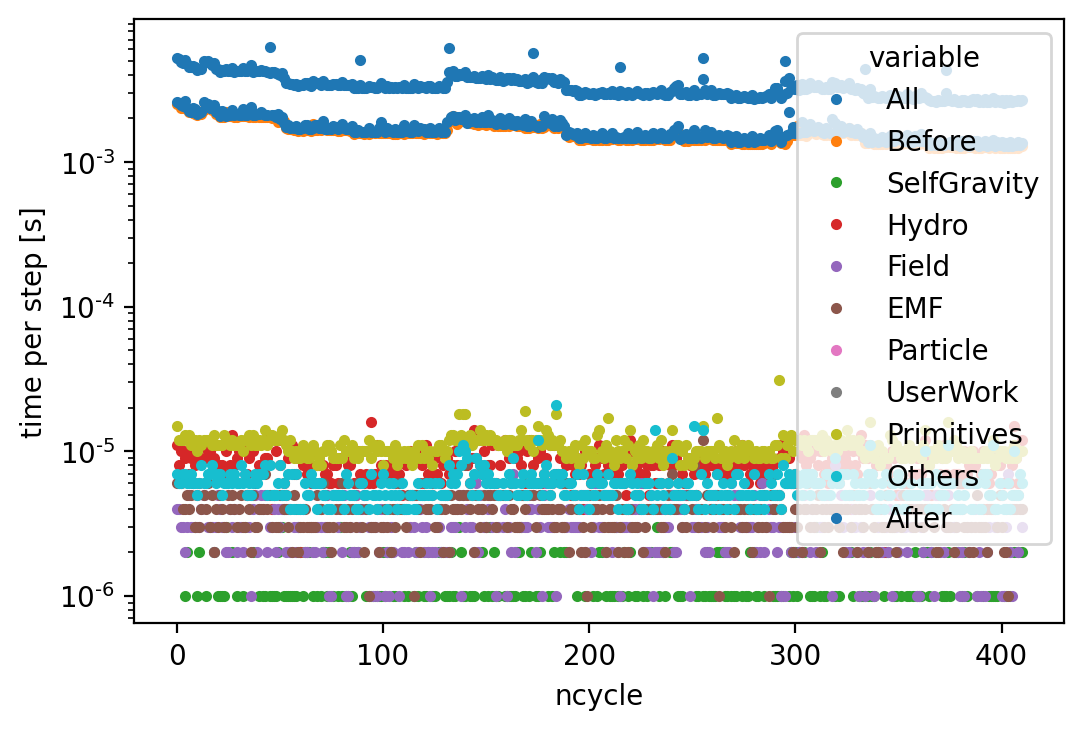

In [9]:
time.to_array().plot(hue='variable',marker='.',ls='')
plt.ylabel('time per step [s]')
plt.yscale('log')

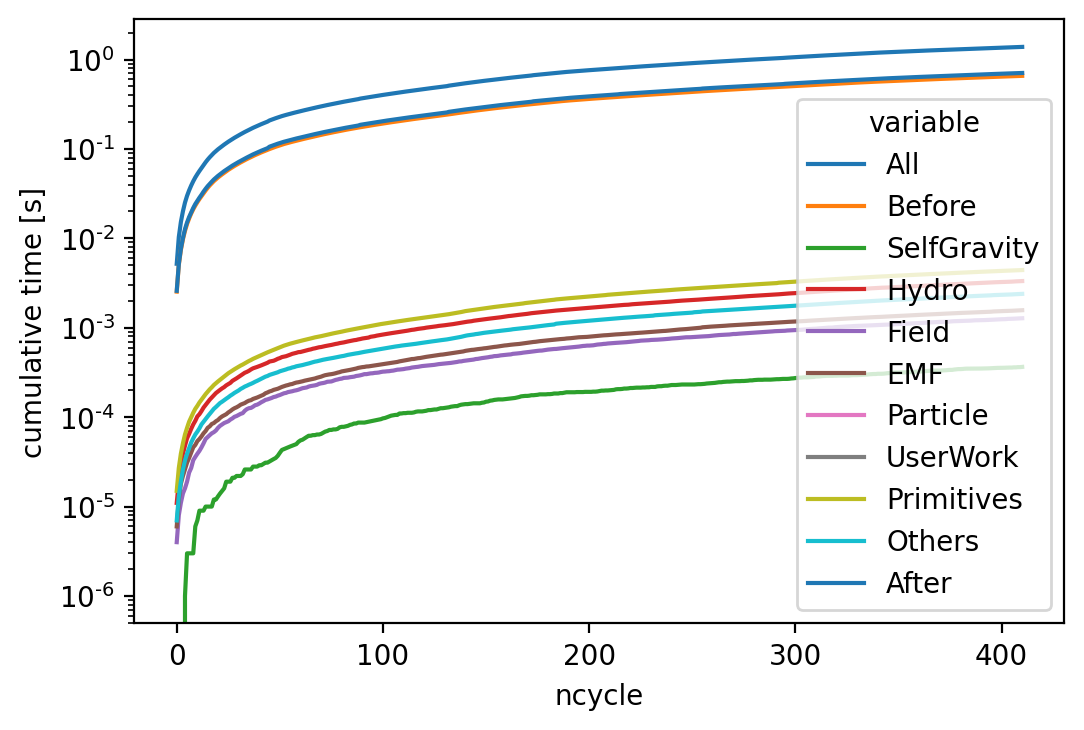

In [10]:
ctime = time.cumsum()
ctime.to_array().plot(hue='variable')
plt.ylabel('cumulative time [s]')
plt.yscale('log')

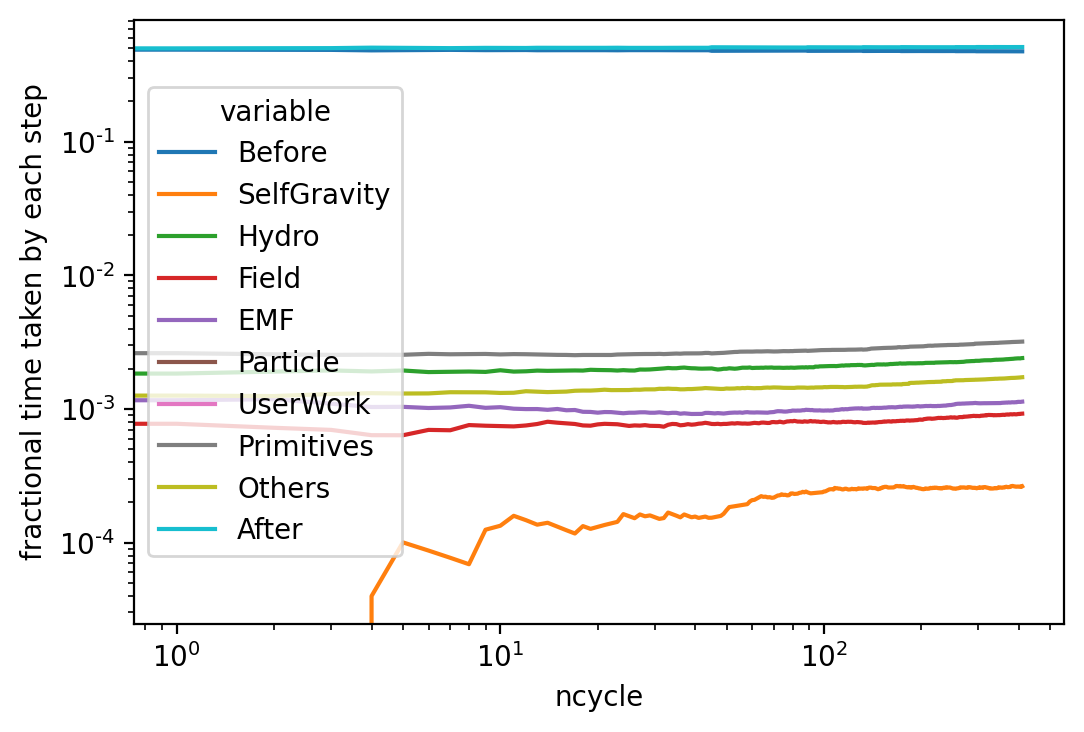

In [11]:
rtime = ctime/ctime['All']
rtime.drop('All').to_array().plot(hue='variable')
plt.ylabel('fractional time taken by each step')
plt.yscale('log')
plt.xscale('log')

by default, `load_timing` will bundle all tasks related to `Hydro` is grouped. But, it is also possible to read all tasks individually using `load_task_ttime` 

In [12]:
ttime=tr.load_task_time()
ttime.index = ttime.ncycle
ttime=ttime.drop(columns='ncycle').to_xarray()

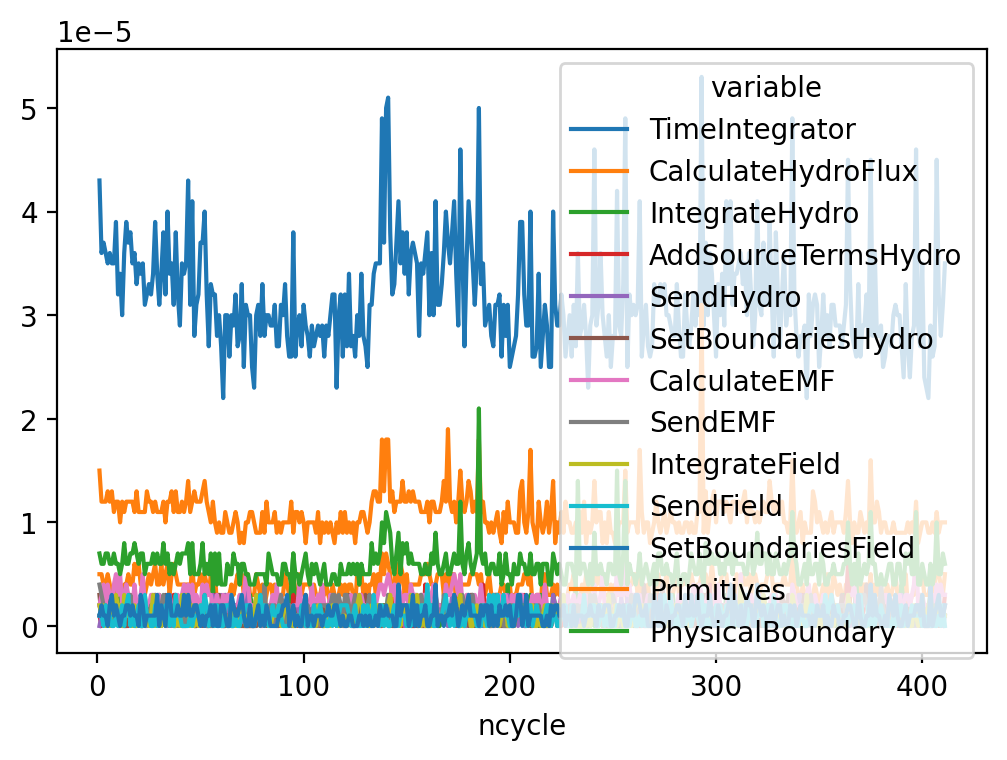

In [13]:
ttime.to_array().plot(hue='variable')

In [14]:
cttime = ttime.cumsum()
rttime = cttime/cttime['TimeIntegrator']

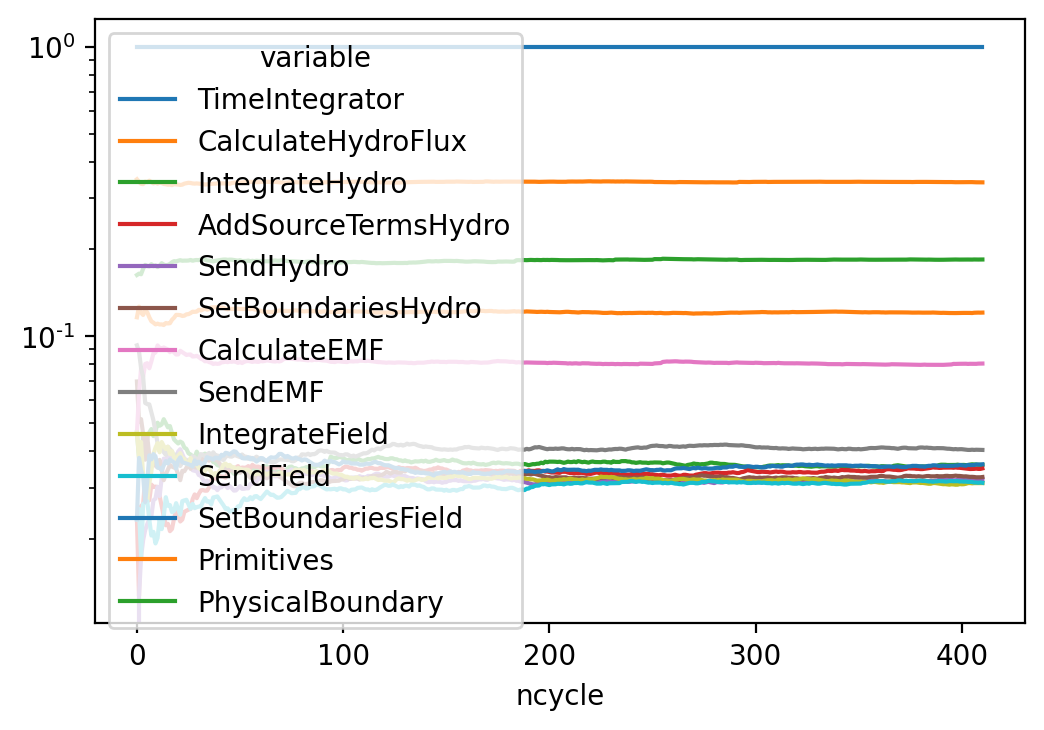

In [15]:
rttime.to_array().plot(hue='variable')
plt.yscale('log')

if the breakdown of the TimeIntegrator is not necessary, one can only read loop time 

In [16]:
ltime=tr.load_loop_time()
ltime.index = ltime.ncycle
ltime=ltime.drop(columns='ncycle').to_xarray()

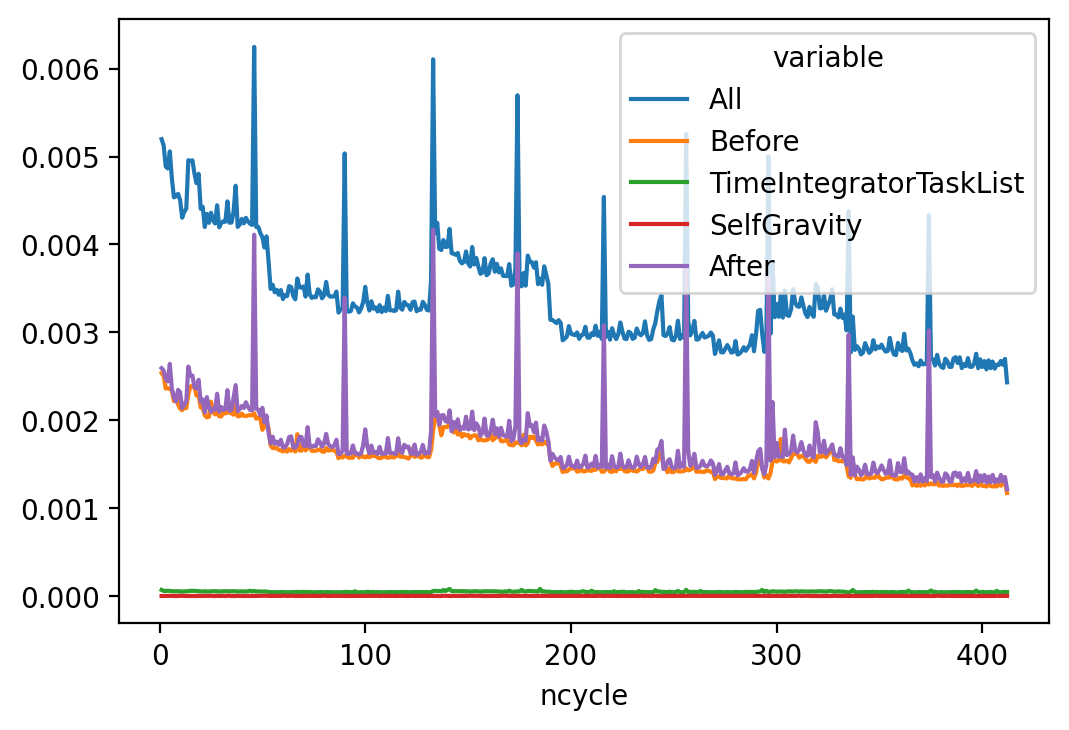

In [17]:
ltime.to_array().plot(hue='variable')

In [18]:
cltime = ltime.cumsum()
rltime = cltime/cltime['All']

note that, in this example, diffusion is solved before and after the time integrator.

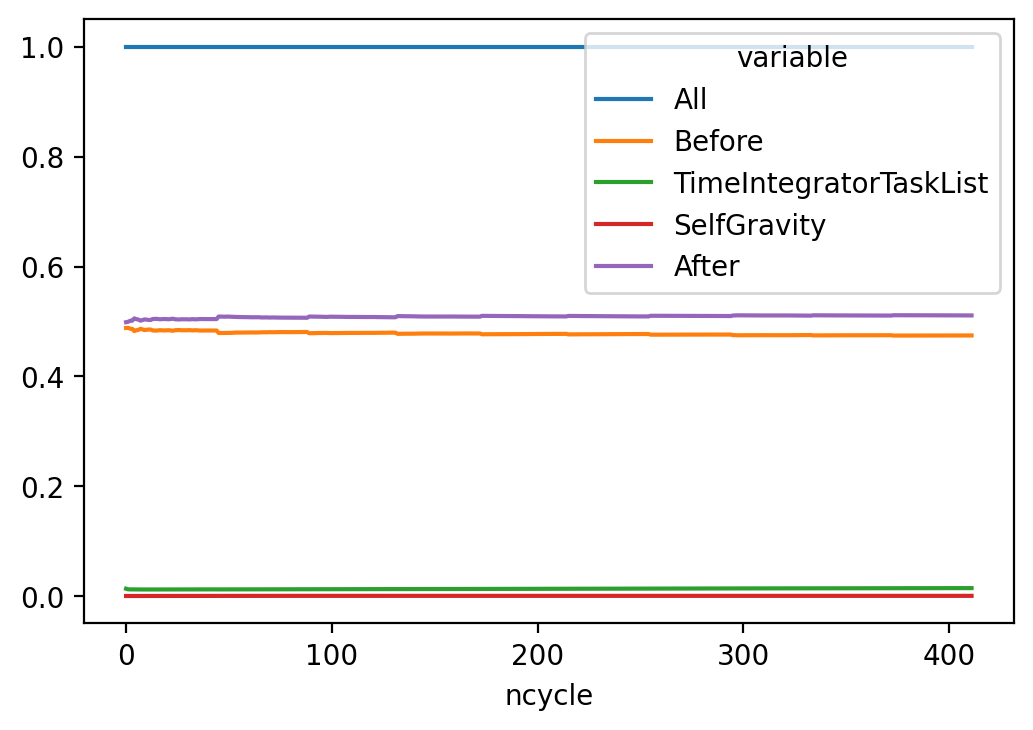

In [19]:
rltime.to_array().plot(hue='variable')